# Исследование надежности заемщиков.

### Шаг 1. Обзор данных

Создадим переменную `df`, содержащую таблицу с выгрузкой:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/datasets/data.csv')

### Шаг 2.1 Заполнение пропусков

В первую очередь получим общую информацию о таблице:

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Можем заметить, что что большинство столбцов имеют по 21525 значений, только 2 столбца имеют по 19351 значения. Из условия известно, что столбец `days_employed` имеет пропуски, таким образом, интересующий нас столбец - `total_income`. Тип данных в этом столбце - `float64`, значит, пропуски имеют значения `NaN`. Определим количество пропусков:

In [3]:
nan_total_income = len(df[df['total_income'].isna()])
nan_total_income

2174

Определим долю пропусков от общего количества значений:

In [4]:
nan_total_income / df['total_income'].count()

0.11234561521368405

Доля пропусков в столбце `total_income` довольна высока - более 11%. Вероятно, это связано с тем, что клиены сознательно скрывали свои полные доходы, если при заполнении данных это было необязательно указывать. Для продолжения исследования необходимо заполнить эти пропуски. Заполним их медианным значением. Это лучшее решение, так как при заполнении пропусков столбца медианным значением список распределяется более равномерно по сравнению с заполнением средним значением.

Определим медианное значение:

In [5]:
median_total_income = df['total_income'].median()
median_total_income

145017.93753253992

Заполним пропуски в слолбеце `total_income` медианным значением:

In [6]:
df['total_income'] = df['total_income'].fillna(median_total_income)

Проверим заполнение в этом столбце:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      21525 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


### Шаг 2.2 Проверка данных на аномалии и исправления.

Для проверки столбца `days_employed` на наличие аномалий выведем первые 20 значений с помощью `head()`:

In [8]:
df.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


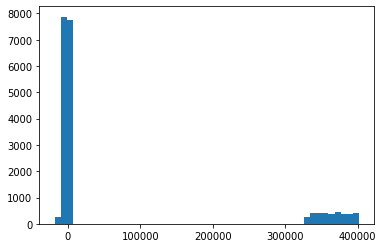

In [10]:
plt.hist(df['days_employed'], bins=50)
plt.show()

Как видно из полученных данных, тип значений - float. При этом присутствуют положительные, отрицательные числа и пропуски. Произведем анализ данных. 

Если сопоставить столбцы `days_employed` и `dob_years`, то есть общий студовой стаж в днях и возраст клиента в годах, можно заметить, что у клиентов, которых студовой стаж указан положительными числами, стаж больше, чем возраст самого клиента. Вероятнее всего эти значения выражены не в днях, а в часах. Поэтому необходимо разделить все положительные числа этого столбца на 24.

Однако необходимо также сделать предположение, что у некоторых клиентов, которых значение стажа положительное число, стаж выражен в днях. Поэтому необходимо сделать предварительную проверку. Создадим выборку с условием, что значение трудового стажа больше нуля и меньше 25550. 25550 дней примерно соответствует 70 годам. Найдем количество таких значений:

In [11]:
df.loc[(df['days_employed'] < 25550) & (df['days_employed'] > 0) ,'days_employed'].count()

0

Количество клиентов, у которых значение трудового стажа - положительное число, выраженное в днях, 0. Таким образом, можем сделать вывод, что все значения в столбце `days_employed` представлены в часах. Разделим эти значения на 24:

In [12]:
df.loc[df['days_employed'] > 0 ,'days_employed'] = df.loc[df['days_employed'] > 0 ,'days_employed'] / 24

Отрицательные же числа по модулю примерно соответствуют реальному стажу клиентов, исходя из их возраста. Поэтому вероятнее всего необходимо только поменять знак этих значений:

In [13]:
df.loc[df['days_employed'] < 0 ,'days_employed'] = -df.loc[df['days_employed'] < 0 ,'days_employed']

Однако остались еще пропуски. Определим их количество:

In [14]:
len(df[df['days_employed'].isna()])

2174

Количество пропусков значительное, более 11% от общего количества значений. Заполним пропуски медианным значением этого столбца.

Определим медианное значение столбца `days_employed`:

In [15]:
med_days_employed = df['days_employed'].median()
med_days_employed

2194.220566878695

Заменим пропуски в столбце `days_employed` на медианное значение `med_days_employed`:

In [16]:
df['days_employed'] = df['days_employed'].fillna(med_days_employed)

Теперь все значения в столбце `days_employed` положительные и соответствуют действительности. Однако оставлять значения количества дней в формате `float` не корректно. Поэтому поменяем тип данных в этом столбце на `int`:

In [17]:
df['days_employed'] = df['days_employed'].astype('int')

Проверим корректность полученных значений:

In [18]:
df['days_employed'].head(20)

0      8437
1      4024
2      5623
3      4124
4     14177
5       926
6      2879
7       152
8      6929
9      2188
10     4171
11      792
12     2194
13     1846
14     1844
15      972
16     1719
17     2369
18    16678
19    10038
Name: days_employed, dtype: int64

Данные отображаются корректно, можем переходить к следующему этапу.

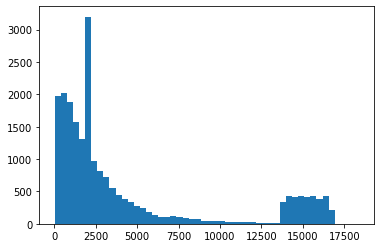

In [19]:
plt.hist(df['days_employed'], bins=50)
plt.show()

Также проверим остальные столбцы с количественным типом данных: gender, dob_years, children

Выведем распределение столбца `gender`:

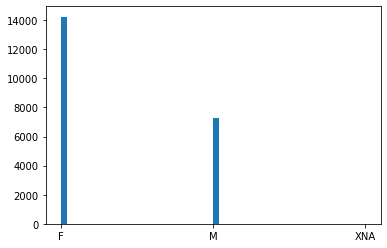

In [20]:
plt.hist(df['gender'], bins=50)
plt.show()

Исходя из полученных данных, большинство клиентов составляют женщины, меньшую часть - мужчины. Однако появилось третье значение - `XNA`. Определим количество таких данных:

In [21]:
df['gender'].value_counts()

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

Значение `XNA` в столбце `gender` единственное. Поэтому можно удалить всю строчку с этим значением, на качестве исследования это практически не отразится:

In [22]:
df = df[df['gender'] != 'XNA']

Сделаем проверку:

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21524 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21524 non-null  int64  
 1   days_employed     21524 non-null  int64  
 2   dob_years         21524 non-null  int64  
 3   education         21524 non-null  object 
 4   education_id      21524 non-null  int64  
 5   family_status     21524 non-null  object 
 6   family_status_id  21524 non-null  int64  
 7   gender            21524 non-null  object 
 8   income_type       21524 non-null  object 
 9   debt              21524 non-null  int64  
 10  total_income      21524 non-null  float64
 11  purpose           21524 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 2.1+ MB


В выгрузке осталось 21524 строчки, что на 1 меньше, чем было до этого, значит, удаление произошло верно. 
Перейдем к следующему столбцу - `dob_years`:

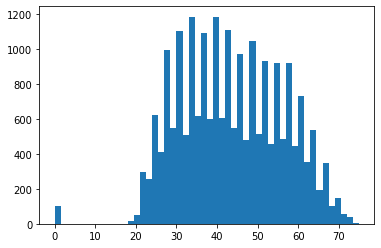

In [24]:
plt.hist(df['dob_years'], bins=50)
plt.show()

Судя по графику, в столбце есть ошибочная информация. Определим количество ошибок:

In [25]:
df[df['dob_years'] < 18]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
99,0,14439,0,Среднее,1,женат / замужем,0,F,пенсионер,0,71291.522491,автомобиль
149,0,2664,0,среднее,1,в разводе,3,F,сотрудник,0,70176.435951,операции с жильем
270,3,1872,0,среднее,1,женат / замужем,0,F,сотрудник,0,102166.458894,ремонт жилью
578,0,16577,0,среднее,1,женат / замужем,0,F,пенсионер,0,97620.687042,строительство собственной недвижимости
1040,0,1158,0,высшее,0,в разводе,3,F,компаньон,0,303994.134987,свой автомобиль
...,...,...,...,...,...,...,...,...,...,...,...,...
19829,0,2194,0,среднее,1,женат / замужем,0,F,сотрудник,0,145017.937533,жилье
20462,0,14113,0,среднее,1,женат / замужем,0,F,пенсионер,0,259193.920299,покупка своего жилья
20577,0,13822,0,среднее,1,Не женат / не замужем,4,F,пенсионер,0,129788.762899,недвижимость
21179,2,108,0,высшее,0,женат / замужем,0,M,компаньон,0,240702.007382,строительство жилой недвижимости


In [26]:
101 / df['dob_years'].count()

0.0046924363501207956

Ошибок с возрастом - 101. Это составляет менее 0.5% от общего количества. Это не значительно, однако для более точного результата исследования лучше оставить эти данные. Т.е. при анализе влияния других столбцов данные из этих строчек будут использоваться, а при исследовании столбца `dob_years` классификацию по возрастам будем производить без этих строк.

Переходим к столбцу `children`:

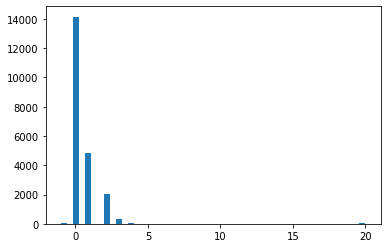

In [27]:
plt.hist(df['children'], bins=50)
plt.show()

Как видно из распределения, есть незначительные аномалии, связанные с количеством детей. Определим количество этих аномалий и их значения:

In [28]:
df['children'].value_counts()

 0     14148
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

Количество детей "-1" - явно аномалия, количество "20" - в целом, вероятно, однако очень сомнительно. Проверим строки с этими значениями:

In [29]:
df[df['children'] == 20].head(15)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
606,20,880,21,среднее,1,женат / замужем,0,M,компаньон,0,145334.865002,покупка жилья
720,20,855,44,среднее,1,женат / замужем,0,F,компаньон,0,112998.738649,покупка недвижимости
1074,20,3310,56,среднее,1,женат / замужем,0,F,сотрудник,1,229518.537004,получение образования
2510,20,2714,59,высшее,0,вдовец / вдова,2,F,сотрудник,0,264474.835577,операции с коммерческой недвижимостью
2941,20,2161,0,среднее,1,женат / замужем,0,F,сотрудник,0,199739.941398,на покупку автомобиля
3302,20,2194,35,среднее,1,Не женат / не замужем,4,F,госслужащий,0,145017.937533,профильное образование
3396,20,2194,56,высшее,0,женат / замужем,0,F,компаньон,0,145017.937533,высшее образование
3671,20,913,23,среднее,1,Не женат / не замужем,4,F,сотрудник,0,101255.492076,на покупку подержанного автомобиля
3697,20,2907,40,среднее,1,гражданский брак,1,M,сотрудник,0,115380.694664,на покупку подержанного автомобиля
3735,20,805,26,высшее,0,Не женат / не замужем,4,M,сотрудник,0,137200.646181,ремонт жилью


Исходя из возраста клиентов очень маловероятно, что у них по 20 детей. Скорее всего произошел некорретный ввод данных.

In [30]:
(76 + 47) / df['children'].count()

0.005714551198661958

Доля аномалий в данном столбце - примерно 0.57%. Однако, как и с прошлым столбцом, не будем удалять эти строчки, а при анализе влияния уже непосредственно столбца `children` на платежеспособность клиентов не будем их учитывать.

### Шаг 2.3. Изменение типов данных.

Произведем данные столбца `total_income` в целочисленный тип с помощью метода astype():

In [31]:
df['total_income'] = df['total_income'].astype('int')

Проверим тип данных столбца `total_income`:

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21524 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   children          21524 non-null  int64 
 1   days_employed     21524 non-null  int64 
 2   dob_years         21524 non-null  int64 
 3   education         21524 non-null  object
 4   education_id      21524 non-null  int64 
 5   family_status     21524 non-null  object
 6   family_status_id  21524 non-null  int64 
 7   gender            21524 non-null  object
 8   income_type       21524 non-null  object
 9   debt              21524 non-null  int64 
 10  total_income      21524 non-null  int64 
 11  purpose           21524 non-null  object
dtypes: int64(7), object(5)
memory usage: 2.1+ MB


Из данных следует, что тип данных изменился на int64, что соответствует целочисленному типу. Проверим корректность данных этого столбца с помощью head():

In [33]:
df.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,14177,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу
5,0,926,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья
6,0,2879,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем
7,0,152,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823,образование
8,2,6929,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы
9,0,2188,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи


Значения столбца отображаются корректно, изменение типа данных произошло успешно.

### Шаг 2.4. Удаление дубликатов.

Сделаем проверку всех столбцов с категоральными значениями на наличие дубликатов.

Проверим столбик `education`. С помощью `unique()` проверим данные:

In [34]:
df['education'].unique()

array(['высшее', 'среднее', 'Среднее', 'СРЕДНЕЕ', 'ВЫСШЕЕ',
       'неоконченное высшее', 'начальное', 'Высшее',
       'НЕОКОНЧЕННОЕ ВЫСШЕЕ', 'Неоконченное высшее', 'НАЧАЛЬНОЕ',
       'Начальное', 'Ученая степень', 'УЧЕНАЯ СТЕПЕНЬ', 'ученая степень'],
      dtype=object)

Исходя из полученного результата, дубликаты произошли из-за разных регистров. Приведем даные к нижнему регистру с помощью `str.lower()`:

In [35]:
df['education'] = df['education'].str.lower()

Проверим измененные значения на уникальность, а также их количество с помощью `value_counts()`:

In [36]:
df['education'].value_counts()

среднее                15233
высшее                  5260
неоконченное высшее      743
начальное                282
ученая степень             6
Name: education, dtype: int64

Из результата следует, что в столбце `education` дубликаты устранены. Далее проверим столбик `family_status` с помощью `value_counts()`:

In [37]:
df['family_status'].value_counts()

женат / замужем          12380
гражданский брак          4176
Не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64

В данном столбце дубликатов не обнаружено. Приведем данные к нижнему регистру и проверим:

In [38]:
df['family_status'] = df['family_status'].str.lower()
df['family_status'].value_counts()

женат / замужем          12380
гражданский брак          4176
не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64

Данные отображаются корректно. Можем переходить к следующему столбцу - `gender`. Проверим с помощью `value_counts()`:

In [39]:
df['gender'].value_counts()

F    14236
M     7288
Name: gender, dtype: int64

Исходя из полученного результата можно сделать вывод, что в этом столбце дубликатов нет.

Проверим следующий столбец - `income_type` на наличие дубликатов:

In [40]:
df['income_type'].value_counts()

сотрудник          11119
компаньон           5084
пенсионер           3856
госслужащий         1459
предприниматель        2
безработный            2
в декрете              1
студент                1
Name: income_type, dtype: int64

В данном столбце дубликатов не обнаружено, переходим к следующему - `purpose`:

In [41]:
df['purpose'].value_counts()

свадьба                                   797
на проведение свадьбы                     777
сыграть свадьбу                           774
операции с недвижимостью                  676
покупка коммерческой недвижимости         664
покупка жилья для сдачи                   653
операции с жильем                         653
операции с коммерческой недвижимостью     651
жилье                                     647
покупка жилья                             647
покупка жилья для семьи                   641
строительство собственной недвижимости    635
недвижимость                              634
операции со своей недвижимостью           630
строительство жилой недвижимости          626
покупка недвижимости                      623
строительство недвижимости                620
покупка своего жилья                      620
ремонт жилью                              612
покупка жилой недвижимости                607
на покупку своего автомобиля              505
заняться высшим образованием      

В данном столбце не содержится значений-дубликатов.

Таким образом, поиск и обработка дубликатов были произведены успешно. При поиске дубликатов основным методом их определения был `value_counts()`. С помощью данного метода автоматически отображаются уникальные значения и их количество. Он был использован, так как одним действием решаются 2 задачи: корректность значений (проверка регистра, по смыслу для строковых значений) и их количество - можно проанализировать, насколько часто используется данное значение, т.е. является ли это ошибкой данных / дубликатом или же нет. 

Вероятные причины возникновения дубликатов: 

столбец `education` - возможно, данные были получены в разных форматах, либо же клиенты, заполняя данные, указывали информацию в разных регистрах;
столбец `purpose` - вероятно, клиенты, указывая данные о цели получения кредита, заполняли их в свободной форме, а не отмечали по конкретным категориям, таким образом, получилось много дубликатов, схожих по смыслу.

Для проверки явных дубликатов воспользуемся методом `duplicated()` и определим их количество:

In [42]:
df.duplicated().sum()

71

Удалим явные дубликаты с учетом новых индексов, сделаем проверку:

In [43]:
df = df.drop_duplicates().reset_index(drop = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21453 entries, 0 to 21452
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   children          21453 non-null  int64 
 1   days_employed     21453 non-null  int64 
 2   dob_years         21453 non-null  int64 
 3   education         21453 non-null  object
 4   education_id      21453 non-null  int64 
 5   family_status     21453 non-null  object
 6   family_status_id  21453 non-null  int64 
 7   gender            21453 non-null  object
 8   income_type       21453 non-null  object
 9   debt              21453 non-null  int64 
 10  total_income      21453 non-null  int64 
 11  purpose           21453 non-null  object
dtypes: int64(7), object(5)
memory usage: 2.0+ MB


Было удалено ровно 71 значение, которое равно количеству явных дубликатов.

### Шаг 2.5. Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма.

Сгруппируем данные по столбцу `education_id`:

In [44]:
df.groupby('education_id')['education'].value_counts()

education_id  education          
0             высшее                  5250
1             среднее                15172
2             неоконченное высшее      743
3             начальное                282
4             ученая степень             6
Name: education, dtype: int64

На основе полученных значений создадим новый DataFrame `df_education`:

In [45]:
data_education = {'education_id' : [0, 1, 2, 3, 4],
                  'education' : ['высшее', 'среднее',
                                 'неоконченное высшее', 'начальное',
                                 'ученая степень']}

df_education = pd.DataFrame(data_education)
df_education

,education_id,education
0,0,высшее
1,1,среднее
2,2,неоконченное высшее
3,3,начальное
4,4,ученая степень


Сгруппируем данные по столбцу `family_status_id`:

In [46]:
df.groupby('family_status_id')['family_status'].value_counts()

family_status_id  family_status        
0                 женат / замужем          12339
1                 гражданский брак          4150
2                 вдовец / вдова             959
3                 в разводе                 1195
4                 не женат / не замужем     2810
Name: family_status, dtype: int64

На основе полученных значений создадим новый DataFrame `df_family_status`:

In [47]:
data_family_status = {'family_status_id' : [0, 1, 2, 3, 4],
                      'family_status' : ['женат / замужем', 'гражданский брак',
                                         'вдовец / вдова', 'в разводе',
                                         'не женат / не замужем']}

df_family_status = pd.DataFrame(data_family_status)
df_family_status

,family_status_id,family_status
0,0,женат / замужем
1,1,гражданский брак
2,2,вдовец / вдова
3,3,в разводе
4,4,не женат / не замужем


Из исходного DataFrame удаляем столбцы `education` и `family_status`:

In [48]:
df = df.drop(['education', 'family_status'], axis = 1)

Проверяем корректность отображения данных:

In [49]:
df.head(10)

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,0,0,F,сотрудник,0,253875,покупка жилья
1,1,4024,36,1,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623,33,1,0,M,сотрудник,0,145885,покупка жилья
3,3,4124,32,1,0,M,сотрудник,0,267628,дополнительное образование
4,0,14177,53,1,1,F,пенсионер,0,158616,сыграть свадьбу
5,0,926,27,0,1,M,компаньон,0,255763,покупка жилья
6,0,2879,43,0,0,F,компаньон,0,240525,операции с жильем
7,0,152,50,1,0,M,сотрудник,0,135823,образование
8,2,6929,35,0,1,F,сотрудник,0,95856,на проведение свадьбы
9,0,2188,41,1,0,M,сотрудник,0,144425,покупка жилья для семьи


### Шаг 2.6. Категоризация дохода.

Создадим новый столбец `total_income_category` со значениями категорий дохода клиентов и проверим корректность отображения данных:

In [50]:
def total_income_category_func(income):   
    
    if (income > 0) and (income <= 30000):
        return 'E'
    elif (income >= 30001) and (income <= 50000):
        return 'D'
    elif (income >= 50001) and (income <= 200000):
        return 'C'
    elif (income >= 200001) and (income <= 1000000):
        return 'B'
    elif income >= 1000001:
        return 'A'
    
df['total_income_category'] = df['total_income'].apply(total_income_category_func)

df.head(15)

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
0,1,8437,42,0,0,F,сотрудник,0,253875,покупка жилья,B
1,1,4024,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,C
2,0,5623,33,1,0,M,сотрудник,0,145885,покупка жилья,C
3,3,4124,32,1,0,M,сотрудник,0,267628,дополнительное образование,B
4,0,14177,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,C
5,0,926,27,0,1,M,компаньон,0,255763,покупка жилья,B
6,0,2879,43,0,0,F,компаньон,0,240525,операции с жильем,B
7,0,152,50,1,0,M,сотрудник,0,135823,образование,C
8,2,6929,35,0,1,F,сотрудник,0,95856,на проведение свадьбы,C
9,0,2188,41,1,0,M,сотрудник,0,144425,покупка жилья для семьи,C


### Шаг 2.7. Категоризация целей кредита.

Проверим столбец `purpose` на уникальность значений:

In [51]:
df['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Создадим функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category` с категориями целей получения кредита и проверим корректность отображения данных. Для поиска значений в строках и фильтрации их по категориям нам необходимы будут следующие подстроки: 'свадь' для категории 'проведение свадьбы', 'недвиж' и 'жиль' для 'операции с недвижимостью', 'образован' для 'получения образования', оставшиеся значения будут классифицироваться как 'операции с автомобилем':

In [52]:
def column_purpose_category(value):
    
    if 'свадь' in value:
        return 'проведение свадьбы'
    elif 'недвиж' in value:
        return 'операции с недвижимостью'
    elif 'жиль' in value:
        return 'операции с недвижимостью'
    elif 'образован' in value:
        return 'получения образования'
    else:
        return 'операции с автомобилем'
       
df['purpose_category'] = df['purpose'].apply(column_purpose_category)

df.head(15)                

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437,42,0,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623,33,1,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124,32,1,0,M,сотрудник,0,267628,дополнительное образование,B,получения образования
4,0,14177,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы
5,0,926,27,0,1,M,компаньон,0,255763,покупка жилья,B,операции с недвижимостью
6,0,2879,43,0,0,F,компаньон,0,240525,операции с жильем,B,операции с недвижимостью
7,0,152,50,1,0,M,сотрудник,0,135823,образование,C,получения образования
8,2,6929,35,0,1,F,сотрудник,0,95856,на проведение свадьбы,C,проведение свадьбы
9,0,2188,41,1,0,M,сотрудник,0,144425,покупка жилья для семьи,C,операции с недвижимостью


### Ответы на вопросы.

##### Вопрос 1: Есть ли зависимость между количеством детей и возвратом кредита в срок?

Для корректного ответа на данный вопрос проверим сначала столбец `debt`:

In [53]:
df['debt'].value_counts()

0    19712
1     1741
Name: debt, dtype: int64

Значения столбца `debt` отображаются корректно. 
Как нам известно из проверки столбца `children` на дубликаты, в нем есть неккоректные значения '-1' и '20'. Поэтому для дальнейшего исследования создадим новый DataFrame без учета этих клиентов, что незначительно исказит полученные результаты:

In [54]:
df_children = df.loc[~df['children'].isin([-1, 20])]
df_children.groupby('debt')['children'].value_counts()

debt  children
0     0           13027
      1            4364
      2            1858
      3             303
      4              37
      5               9
1     0            1063
      1             444
      2             194
      3              27
      4               4
Name: children, dtype: int64

Определим долю задолженности клиентов в зависимости от количества детей:

In [55]:
part_debt_children_0 = 1063 / (13027 + 1063)
part_debt_children_1 = 444 / (4364 + 444)
part_debt_children_2 = 194 / (1858 + 194)
part_debt_children_3 = 27 / (303 + 27)
part_debt_children_4 = 4 / (37 + 4)
part_debt_children_5 = 0

part_debt_children = [part_debt_children_0,
                     part_debt_children_1,
                     part_debt_children_2,
                     part_debt_children_3,
                     part_debt_children_4,
                     part_debt_children_5]

data = {'children' : [0, 1, 2, 3, 4, 5],
        'part' : part_debt_children}

pd.DataFrame(data).sort_values('part', ascending = False)

,children,part
4,4,0.097561
2,2,0.094542
1,1,0.092346
3,3,0.081818
0,0,0.075444
5,5,0.000000


Получили следующий результат по задолженности клиентов: доля клиентов, имеющих 5 детей - 0%, доля клиентов, не имеющих детей или имеющих 3 ребенка - примерно 7.5...8.2 %, доля клиентов, имеющих 1, 2 или 4 детей - менее 10%. Можем сделать вывод, что у клиентов с детьми большая доля задолженности, чем у клиентов без детей, за исключением клиентов, у которых 5 детей. Верояно, нулевая задолженность у клиентов с 5 детьми связана либо с очень малой выборкой, либо с возможными льготами от государства по отношению к банковскому кредиту.

##### Вывод 1: Доля задолженности у клиентов зависит от количества детей.

##### Вопрос 2: Есть ли зависимость между семейным положением и возвратом кредита в срок?

Сгруппируем по столбцу `debt` столбец `family_status_id`:

In [56]:
df.groupby('debt')['family_status_id'].value_counts()

debt  family_status_id
0     0                   11408
      1                    3762
      4                    2536
      3                    1110
      2                     896
1     0                     931
      1                     388
      4                     274
      3                      85
      2                      63
Name: family_status_id, dtype: int64

Определим долю задолженности клиентов в зависимости от семейного положения:

In [57]:
part_family_status_0 = 931 / (931 + 11408)
part_family_status_1 = 388 / (388 + 3762)
part_family_status_2 = 63 / (63 + 896)
part_family_status_3 = 85 / (85 + 1110)
part_family_status_4 = 274 / (274 + 2536)

part_family_status = [part_family_status_0, part_family_status_1,
                   part_family_status_2, part_family_status_3,
                   part_family_status_4]

data_part_family_status = {'dob_years_group' : ['женат / замужем', 'гражданский брак',
                                                'вдовец / вдова', 'в разводе',
                                                'не женат / не замужем'],
                        'part' : part_family_status}

pd.DataFrame(data_part_family_status).sort_values('part', ascending = False)

,dob_years_group,part
4,не женат / не замужем,0.097509
1,гражданский брак,0.093494
0,женат / замужем,0.075452
3,в разводе,0.071130
2,вдовец / вдова,0.065693


##### Вывод 2:  Самая низкая доля задолженности у клиентов со статусом "вдовец / вдова" - примерно 6.6%, средняя - со статусом "в разводе" и "женат / замужем" - 7.1% и 7.5% соответственно, высокая - ''гражданский брак" и "не женат / не замужем" - 9.3% и 9.8% соответственно.

##### Вопрос 3: Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Для ответа на данный вопрос попробуем выявить зависимость между категорией дохода клиента и возвратом кредита в срок.

Создадим отдельный DataFrame для работы по заданным критериям:

In [58]:
df_income_debt = df[['total_income_category', 'debt']]

Сгруппируем созданный DataFrame `df_income_debt`:

In [59]:
df_income_debt.groupby('debt')['total_income_category'].value_counts()

debt  total_income_category
0     C                        14656
      B                         4684
      D                          329
      A                           23
      E                           20
1     C                         1360
      B                          356
      D                           21
      A                            2
      E                            2
Name: total_income_category, dtype: int64

Определим долю задолженности клиентов в зависимости от их полного дохода:

In [60]:
part_debt_income_A = 2 / (23 + 2)
part_debt_income_B = 356 / (4684 + 356)
part_debt_income_C = 1360 / (14656 + 1360)
part_debt_income_D = 21 / (329 + 21)
part_debt_income_E = 2 / (20 + 2)

part_debt_income = [part_debt_income_A,
                    part_debt_income_B,
                    part_debt_income_C,
                    part_debt_income_D,
                    part_debt_income_E]

data_debt_income = {'total_income_category' : ['A', 'B', 'C', 'D', 'E'],
        'part' : part_debt_income}

pd.DataFrame(data_debt_income).sort_values('part', ascending = False)

,total_income_category,part
4,E,0.090909
2,C,0.084915
0,A,0.080000
1,B,0.070635
3,D,0.060000


Получили следующий результат по задолженности клиентов: в процентном соотношении доля задолженностей клиентов по катерогиям дохода лежит в интервале от 6% до 10%, т.е. разброс значений сравнительно невелик. Самая большая доля клиентов с задолженностями - примерно 9.1% - клиенты категории Е, у которых доходы самые низкие. Однако у клиентов с самыми большими доходами категории А доля задолженности немногим ниже - примерно 8%. Самая же низкая доля задолженных клиентов в категории D - 6%. Таким образом, можно сделать вывод о том, нет прямой зависимости между возвратом кредита в срок и уровнем дохода клиента.

##### Вывод 3: Нет прямой зависимости между возвратом кредита в срок и уровнем дохода клиента.

##### Вопрос 4: Как разные цели кредита влияют на его возврат в срок?

Проверим зависимость возврата кредита в срок в зависимости от других факторов: тип занятости, пол клиента, цель получения кредита, уровень образования клиента, возраст клиента в годах.

Сгруппируем по столбцу `debt` столбец `income_type`:

In [61]:
df.groupby('debt')['income_type'].value_counts()

debt  income_type    
0     сотрудник          10023
      компаньон           4701
      пенсионер           3613
      госслужащий         1371
      предприниматель        2
      безработный            1
      студент                1
1     сотрудник           1061
      компаньон            376
      пенсионер            216
      госслужащий           86
      безработный            1
      в декрете              1
Name: income_type, dtype: int64

Определим долю задолженности клиентов в зависимости от типа занятости:

In [62]:
part_employee = 1061 / (1061 + 10023)
part_companion = 376 / (376 + 4701)
part_pensioner = 216 / (216 + 3613)
part_civil_servant = 86 / (86 + 1371)
part_entrepreneur = 0
part_unemployed = 1 / 2
part_student = 0
part_on_maternity_leave = 1

part_income_type = [part_employee, part_companion, part_pensioner, 
                    part_civil_servant, part_entrepreneur, part_unemployed,
                    part_student, part_on_maternity_leave]

data_debt_gender = {'income_type' : ['сотрудник', 'компаньон', 'пенсионер', 'госслужащий',
                                     'предприниматель', 'безработный', 'студент', 'в декрете'],
        'part' : part_income_type}

pd.DataFrame(data_debt_gender).sort_values('part', ascending = False)

,income_type,part
7,в декрете,1.000000
5,безработный,0.500000
0,сотрудник,0.095724
1,компаньон,0.074059
3,госслужащий,0.059025
2,пенсионер,0.056412
4,предприниматель,0.000000
6,студент,0.000000


Как видно из результата, наибольший разброс значений у клиентов со статусами 'в декрете', 'безработный', 'предприниматель' и 'студент'. Для более точного результата определим, какую часть составляет их количество от общего количества клиентов:

In [63]:
df_income_type = df[df['income_type'].isin(['в декрете', 'безработный', 'предприниматель', 'студент'])]
df_income_type['income_type'].count() / df['income_type'].count()

0.00027968116347364006

Доля клиентов со статусами 'в декрете', 'безработный', 'предприниматель' и 'студент' составляет менее 0.03% от общего количества клиентов. Таким образом, будет некорректно сравнивать долю задолженности у этих клиентов с клиентами остальных категорий, так как выборка этих клиентов очень низкая по сравнению с остальными. Поэтому будем продолжать сравнение по критерию "тип занятости" только для клиентов со статусами "сотрудник", "компаньон", "госслужащий", "пенсионер".

Получили следующий результат по задолженности клиентов: низкая задолженность у пенсионеров и госслужащих (примерно 5.6% и 5.9% соответсвенно), средняя - у компаньонов - примерно 7.4%, наиболее высокая - у сотрудников - примерно 9.6%.  

Сгруппируем по столбцу `debt` столбец `gender`:

In [64]:
df.groupby('debt')['gender'].value_counts()

debt  gender
0     F         13180
      M          6532
1     F           994
      M           747
Name: gender, dtype: int64

Определим долю задолженности клиентов в зависимости от пола клиента:

In [65]:
part_gender_M = 747 / (747 + 6532)
part_gender_F = 994 / (994 + 13180)

part_gender = [part_gender_M, part_gender_F]

data_debt_gender = {'gender' : ['M', 'F'],
        'part' : part_gender}

pd.DataFrame(data_debt_gender).sort_values('part', ascending = False)

,gender,part
0,M,0.102624
1,F,0.070128


Получили следующий результат по задолженности клиентов: задолженность у клиентов женского пола ниже - примерно 7%, у клиентов мужского пола значительно выше - примерно 10.2%.

Сгруппируем по столбцу `debt` столбец `purpose_category`:

In [66]:
df.groupby('debt')['purpose_category'].value_counts()

debt  purpose_category        
0     операции с недвижимостью    10028
      операции с автомобилем       3903
      получения образования        3643
      проведение свадьбы           2138
1     операции с недвижимостью      782
      операции с автомобилем        403
      получения образования         370
      проведение свадьбы            186
Name: purpose_category, dtype: int64

Определим долю задолженности клиентов в зависимости от цели получения кредита:

In [67]:
part_property = 782 / (10028 + 782)
part_car = 403 / (3903 + 403)
part_education = 370 / (370 + 3643)
part_wedding = 186 / (186 + 2138)

part_purpose = [part_property, part_car, part_education, part_wedding]

data_part_purpose = {'purpose' : ['операции с недвижимостью', 'операции с автомобилем',
                                  'получение образования', 'проведение свадьбы'],
        'part' : part_purpose}

pd.DataFrame(data_part_purpose).sort_values('part', ascending = False)

,purpose,part
1,операции с автомобилем,0.093590
2,получение образования,0.092200
3,проведение свадьбы,0.080034
0,операции с недвижимостью,0.072340


Получили следующий результат по задолженности клиентов: более низкая задолженность у клиентов, целью получения кредита которых являются "операции с недвижимостью" и "проведение свадьбы" - 7.2% и 8% соответственно, более высокая - у "получение образования" и "операции с автомобилем" - 9.2% и 9.4% соответственно.

Сгруппируем по столбцу `debt` столбец `education_id`:

In [68]:
df.groupby('debt')['education_id'].value_counts()

debt  education_id
0     1               13808
      0                4972
      2                 675
      3                 251
      4                   6
1     1                1364
      0                 278
      2                  68
      3                  31
Name: education_id, dtype: int64

Определим долю задолженности клиентов в зависимости от уровня образования клиента:

In [69]:
part_0 = 278 / (278 + 4972)
part_1 = 1364 / (13808 + 1364)
part_2 = 68 / (675 + 68)
part_3 = 31 / (31 + 251)
part_4 = 0

part_education = [part_0, part_1, part_2, part_3, part_4]

data_part_education = {'education' : ['высшее', 'среднее',
                                  'неоконченное высшее', 'начальное', 'ученая степень'],
        'part' : part_education}

pd.DataFrame(data_part_education).sort_values('part', ascending = False)

,education,part
3,начальное,0.109929
2,неоконченное высшее,0.091521
1,среднее,0.089902
0,высшее,0.052952
4,ученая степень,0.000000


Получили следующий результат по задолженности клиентов: нулевая задолженность у клиентов с ученой степенью, низкая - с высшим образованием - 5.3%, средняя - со средним образованием - 9%, высокая - с неоконченным высшим образованием - 9.2%, наивысшая - с начальным образованием - 10.9%.

Для определения доли клиентов с задолженностями, разделим их на определенные возрастные категории: до 25 лет, 26-35 лет, 36-45 лет, 46-55 лет, 56-65 лет, 66 и более. Для этого создадим функцию `age_group`, определяющую категорию возраста, и дополнительный столбец в основном DataFrame `dob_years_group`, в который будут сохраняться полученные значения: 

In [70]:
def age_group(age):
 
    if age <= 25:
        return 'до 25'
    elif age <= 35:
        return '26-35'
    elif age <= 45:
        return '36-45'
    elif age <= 55:
        return '46-55'
    elif age <= 65:
        return '56-65'
    elif age <= 65:
        return '56-65'
    else:
        return 'более 65'

df['dob_years_group'] = df['dob_years'].apply(age_group)    

Сгруппируем по столбцу `debt` столбец `dob_years_group`:

In [71]:
df.groupby('debt')['dob_years_group'].value_counts()

debt  dob_years_group
0     36-45              5153
      26-35              4784
      46-55              4486
      56-65              3429
      до 25              1193
      более 65            667
1     26-35               567
      36-45               467
      46-55               328
      56-65               205
      до 25               139
      более 65             35
Name: dob_years_group, dtype: int64

Определим долю задолженности клиентов в зависимости от возраста клиента:

In [72]:
dob_years_group_25 = 139 / (139 + 1193)
dob_years_group_26_35 = 567 / (567 + 4784)
dob_years_group_36_45 = 467 / (467 + 5153)
dob_years_group_46_55 = 328 / (328 + 4486)
dob_years_group_56_65 = 205 / (205 + 3429)
dob_years_group_66 = 35 / (35 + 667)

dob_years_group = [dob_years_group_25, dob_years_group_26_35,
                   dob_years_group_36_45, dob_years_group_46_55,
                   dob_years_group_56_65, dob_years_group_66]

data_dob_years_group = {'dob_years_group' : ['до 25', '26-35', '36-45', '46-55', '56-65', 'более 65'],
                        'part' : dob_years_group}

pd.DataFrame(data_dob_years_group).sort_values('part', ascending = False)

,dob_years_group,part
1,26-35,0.105962
0,до 25,0.104354
2,36-45,0.083096
3,46-55,0.068135
4,56-65,0.056412
5,более 65,0.049858


Получили следующий результат по задолженности клиентов: наименьшая задолженность у клиентов "более 65" лет - 4.9%, низкая - "56-65" лет - 5.6%, средняя - "46-55" - 6.8%, высокая - "36-45" - 8.3%, самая высокая - "до 25" и "26-35" лет. При сравнению по этому критерию хорошо прослеживается закономерность: чем старше клиент, тем меньше вероятность его задолженности.

Создадим также сводную таблицу, которая будет отражать долю задолженности в зависимости от возраста и пола клиента по количеству детей: 

In [73]:
pd.pivot_table(df, index = ['debt'], columns = ['dob_years_group', 'gender'], values = ['children'])

children                                                   \
dob_years_group     26-35              36-45               46-55             
gender                  F        M         F         M         F         M   
debt                                                                         
0                0.946850  0.74421  0.722156  0.890808  0.226553  0.426316   
1                0.917981  0.77600  0.886364  0.783251  0.298913  0.486111   

                                                                             
dob_years_group     56-65            более 65               до 25            
gender                  F         M         F         M         F         M  
debt                                                                         
0                0.154200  0.125304  0.050485  0.157895  0.472262  0.340816  
1                0.238806  0.084507  0.040000  0.100000  0.485714  0.159420

## Общий вывод:

Было проведено исследование, какие есть зависимости между выбранными личными данными клиента и его задолженностью перед банком. Анализ производился по следующим критериям: количество детей, семейное положение, уровень дохода, тип занятости, пол клиента, цель получения кредита, уровень образования клиента, возраст клиента в годах.

Во время предварительной обработки данных столкнулся со следующими проблемами: явные дубликаты, отсутствие данных, некорректные значения данных, в том числе и отображение их в разных единицах измерения. Корректировал данные разными методами. 
Например, явные дубликаты необходимо было удилить в любом случае, некорректное значение пола было всего 1, поэтому строчку с данным значением можно было также удалить. 
В ситуациях с некорректными значениями данных, например, количество детей '-1' или возраст клиента '0' также можно было бы удалить, так как доля таких значений было менее 1% от общего количества. Однако для более точного результата было принято решение учитывать строки с этими данными, если исследование влияния производилось по другим параметрам, и игнорировать, создавая новый датафрейм без учета данных аномалий, если анализ производился непосредственно по столбцам, где они присутствовали. 
В ситуациях, когда некорректные данные были в значительном количестве, было принято решение заполнять аномалии медианным значением и производить дальнейший анализ с учетом медианного значения.

Во время исследования влияния различных факторов на платежеспособность клиентов были сделаны следующие выводы о том, что доля задолженности больше: у клиентов с детьми про сравнению с клиентами без детей, клиентов мужского пола по сравнению с женским, клиентов младшего возраста по сравнению со старшим, клиентов, не состоящих или не состоящих ранее в браке, клиентов с начальным образованием по сравнению с клиентами с высшим и др.
Было также обнаружено, что уровень дохода клиента не влияет на возврат кредита в срок.

Таким образом, можно сделать вывод: наиболее платежеспособные клиенты - без детей, женского пола, с высшим образованием, старшего возраста, находящиеся в браке или ранее состаявшие в нем, целью кредита которых являются 'операции с недвижимостью' или 'проведение свадьбы', пенсионеры или госсужащие.